In [1]:
# Import 
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
from keras.optimizers import Adam
from sklearn.model_selection import KFold   
import tensorflow
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.models import Model
from sklearn.datasets import make_classification

Using TensorFlow backend.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
#load data
Data_clean = pd.read_excel('data_balanced.xlsx')
Data_clean.head()

,month,Age,Amount_netCN,TermOfPaymentDays,GDP by State,Unemployment rate,ZIP,DefaultStatus,month1,month2,...,month4,month5,month6,month7,month8,month9,month10,month11,month12,Feq_default_ZipCode
0,2,66,60.78,30,47900,0.027,85077,0,0,1,...,0,0,0,0,0,0,0,0,0,0.062500
1,4,78,50.88,30,47900,0.027,81247,0,0,0,...,1,0,0,0,0,0,0,0,0,0.015385
2,9,73,60.88,30,37100,0.051,49356,0,0,0,...,0,0,0,0,0,1,0,0,0,0.102564
3,5,51,42.89,30,39400,0.066,46284,0,0,0,...,0,1,0,0,0,0,0,0,0,0.111111
4,4,78,59.78,30,47900,0.027,84076,0,0,0,...,1,0,0,0,0,0,0,0,0,0.032258


In [4]:
#Get info
Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41978 entries, 0 to 41977
Data columns (total 21 columns):
month                  41978 non-null int64
Age                    41978 non-null int64
Amount_netCN           41978 non-null float64
TermOfPaymentDays      41978 non-null int64
GDP by State           41978 non-null int64
Unemployment rate      41978 non-null float64
ZIP                    41978 non-null int64
DefaultStatus          41978 non-null int64
month1                 41978 non-null int64
month2                 41978 non-null int64
month3                 41978 non-null int64
month4                 41978 non-null int64
month5                 41978 non-null int64
month6                 41978 non-null int64
month7                 41978 non-null int64
month8                 41978 non-null int64
month9                 41978 non-null int64
month10                41978 non-null int64
month11                41978 non-null int64
month12                41978 non-null int64
Feq_def

In [5]:
# Check null value (Print a null value column array)
print(Data_clean.columns[Data_clean.isnull().any()])

Index([], dtype='object')


In [6]:
#Create features and target
X = Data_clean.loc[:, Data_clean.columns != "DefaultStatus"]
y = Data_clean[["DefaultStatus"]]

In [7]:
#Create features and target 
X = X.values
y = y.values

In [8]:
#check shape
X.shape

(41978, 20)

In [9]:
#scale data
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
#Split train set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3, random_state= 123)

In [11]:
#check the data shape
print(X_train.shape,X_test.shape, Y_train.shape,  Y_test.shape)

(29384, 20) (12594, 20) (29384, 1) (12594, 1)


In [12]:
#create inputShape for the shape (for convenient)
inputShape=X_train.shape[1]
inputShape

20

In [13]:
# function to choose the optimal number of layers and neurons
def create_model_layer(nl=1,nn=256, learning_rate=0.01, activation='relu'):
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
    model = Sequential()
    model.add(Dense(32, input_shape=(inputShape,), activation='relu'))
    model.add(BatchNormalization())
    # Add as many hidden layers as specified in nl
    for i in range(nl):
        # Layers have nn neurons
        model.add(Dense(nn, activation='relu'))
        model.add(BatchNormalization())
    # End defining and compiling model...
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [14]:
# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model_layer) 

In [15]:
# Define parameters
params = dict(nl=[2, 3], nn=[32,64])
# params = dict(nl=[3, 5], nn=[64,128])

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                       patience=5)

random_search_results = random_search.fit(X_train,Y_train, validation_data=(X_test, Y_test),
           callbacks=[monitor_val_acc])

print("Best: %f using %s".format(random_search_results.best_score_,
random_search_results.best_params_))

Train on 19589 samples, validate on 12594 samples
Epoch 1/1
9795/9795 [==============================] - 0s 18us/step
Train on 19589 samples, validate on 12594 samples
Epoch 1/1
8640/9795 [=========================>....] - ETA: 9795/9795 [==============================] - 0s 18us/step
Train on 19590 samples, validate on 12594 samples
Epoch 1/1
9794/9794 [==============================] - 0s 18us/step
Train on 19589 samples, validate on 12594 samples
Epoch 1/1
9795/9795 [==============================] - 0s 25us/step
Train on 19589 samples, validate on 12594 samples
Epoch 1/1
9795/9795 [==============================] - 0s 26us/step
Train on 19590 samples, validate on 12594 samples
Epoch 1/1
9794/9794 [==============================] - 0s 22us/step
Train on 19589 samples, validate on 12594 samples
Epoch 1/1
9795/9795 [==============================] - 0s 21us/step
Train on 19589 samples, validate on 12594 samples
Epoch 1/1
9795/9795 [==============================] - 0s 28us/step
Train 

In [16]:
# #Check the best score
# random_search_results.best_score_

In [17]:
#Check the best param
random_search_results.best_params_

{'nn': 32, 'nl': 3}

In [18]:
#assign best params to variables
nn=random_search_results.best_params_['nn']
nl=random_search_results.best_params_['nl']

In [19]:
# Now we have the optimal number of layers and neurons. Let tunning other hyperparameters

In [20]:
# Creates a model given an activation and learning rate
def create_model(learning_rate=0.01, activation='relu'):
	# Create an Adam optimizer with the given learning rate
	opt = Adam(lr=learning_rate)
	# Create your binary classification model
	model = Sequential()
	model.add(Dense(32, input_shape=(inputShape,), activation=activation))
	model.add(BatchNormalization())
	# Add as many hidden layers as specified in nl
	for i in range(nl):
		# Layers have nn neurons
		model.add(Dense(nn, activation=activation))
		model.add(BatchNormalization())
    # End defining and compiling model...
	model.add(Dense(1, activation='sigmoid'))
	# Compile your model with your optimizer, loss, and metrics
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [21]:
# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model) 

In [22]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
# Check how your keras model performs with 5 fold crossvalidation
kfold = cross_val_score(model, X_train, Y_train, cv=5)
# Print the mean accuracy per fold
kfold.mean()

Epoch 1/1
5877/5877 [==============================] - 0s 46us/step
Epoch 1/1
5877/5877 [==============================] - 0s 70us/step
Epoch 1/1
5877/5877 [==============================] - 0s 36us/step
Epoch 1/1
5877/5877 [==============================] - 0s 49us/step
Epoch 1/1
5876/5876 [==============================] - 0s 34us/step


0.7146404981613159

In [23]:
# Define the parameters 
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128], 
          'epochs': [50, 100], 'learning_rate': [0.1, 0.01]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                       patience=5)

random_search_results = random_search.fit(X_train,Y_train, validation_data=(X_test, Y_test),
           callbacks=[monitor_val_acc])

print("Best: %f using %s".format(random_search_results.best_score_,
random_search_results.best_params_))


y: 0.7291 - val_loss: 0.6409 - val_accuracy: 0.6666
Epoch 18/50
19590/19590 [==============================] - 1s 29us/step - loss: 0.5387 - accuracy: 0.7253 - val_loss: 0.7644 - val_accuracy: 0.6612
Epoch 19/50
19590/19590 [==============================] - 1s 29us/step - loss: 0.5353 - accuracy: 0.7289 - val_loss: 0.5724 - val_accuracy: 0.6852
Epoch 20/50
19590/19590 [==============================] - 1s 29us/step - loss: 0.5353 - accuracy: 0.7286 - val_loss: 0.5869 - val_accuracy: 0.7148
Epoch 21/50
19590/19590 [==============================] - 1s 29us/step - loss: 0.5329 - accuracy: 0.7274 - val_loss: 0.6362 - val_accuracy: 0.6769
Epoch 22/50
19590/19590 [==============================] - 1s 29us/step - loss: 0.5429 - accuracy: 0.7221 - val_loss: 0.5504 - val_accuracy: 0.7317
Epoch 23/50
19590/19590 [==============================] - 1s 32us/step - loss: 0.5333 - accuracy: 0.7297 - val_loss: 0.6076 - val_accuracy: 0.7230
Epoch 24/50
19590/19590 [==============================] - 1

In [24]:
# #check the best score
# random_search_results.best_score_

In [25]:
#check the best params
random_search_results.best_params_

{'learning_rate': 0.01, 'epochs': 100, 'batch_size': 32, 'activation': 'relu'}

In [26]:
#create model from the best params
model_best1 = KerasClassifier(build_fn = create_model) 
model_best = model_best1.set_params(**random_search_results.best_params_)

In [27]:
#show the best params
model_best.get_params()

{'learning_rate': 0.01,
 'epochs': 100,
 'batch_size': 32,
 'activation': 'relu',
 'build_fn': <function __main__.create_model(learning_rate=0.01, activation='relu')>}

In [28]:
# Fit the model
hist=model_best.fit(X_train, Y_train, validation_data=(X_test, Y_test))

Train on 29384 samples, validate on 12594 samples
Epoch 1/100
29384/29384 [==============================] - 4s 125us/step - loss: 0.5696 - accuracy: 0.7095 - val_loss: 0.5652 - val_accuracy: 0.7190
Epoch 2/100
29384/29384 [==============================] - 3s 91us/step - loss: 0.5517 - accuracy: 0.7182 - val_loss: 0.5457 - val_accuracy: 0.7231
Epoch 3/100
29384/29384 [==============================] - 2s 84us/step - loss: 0.5488 - accuracy: 0.7169 - val_loss: 0.5513 - val_accuracy: 0.7188
Epoch 4/100
29384/29384 [==============================] - 3s 88us/step - loss: 0.5465 - accuracy: 0.7228 - val_loss: 0.5347 - val_accuracy: 0.7315
Epoch 5/100
29384/29384 [==============================] - 3s 87us/step - loss: 0.5455 - accuracy: 0.7207 - val_loss: 0.5398 - val_accuracy: 0.7266
Epoch 6/100
29384/29384 [==============================] - 3s 92us/step - loss: 0.5446 - accuracy: 0.7209 - val_loss: 0.5830 - val_accuracy: 0.6846
Epoch 7/100
29384/29384 [==============================] - 2s

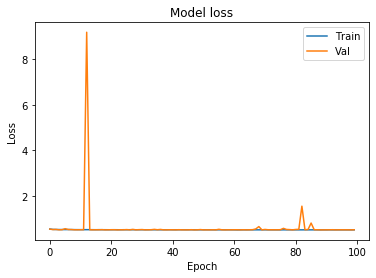

In [29]:
#summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

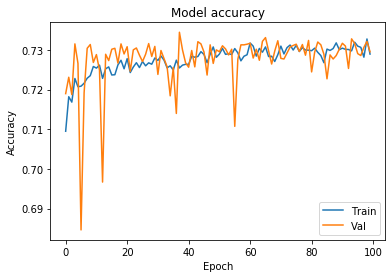

In [30]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

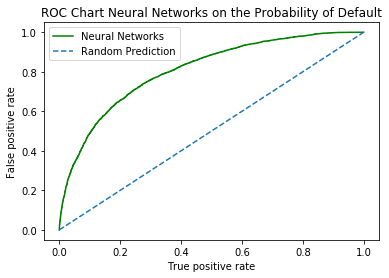

In [31]:
# Plot the ROC curve of the probabilities of default
prob_default_model = model_best.predict_proba(X_test)[:, 1]

# ROC chart components
fallout, sensitivity, thresholds = roc_curve(Y_test, prob_default_model)  #prob_default is prob

plt.plot(fallout, sensitivity, color = 'green',  label='%s' % 'Neural Networks')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart Neural Networks on the Probability of Default")
plt.xlabel('True positive rate')   #'Fall-out'
plt.ylabel('False positive rate')  #'Sensitivity'
plt.legend()
plt.show()

In [32]:
# # Compute the AUC and store it in a variable
# auc = roc_auc_score(Y_test, prob_default_model)
# print(auc)

In [33]:
#save model
import pickle
filename = 'neural_model.sav'
pickle.dump(model_best, open(filename, 'wb'))

In [34]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict_proba(X_test)


array([[0.5746115 , 0.42538851],
       [0.39101917, 0.60898083],
       [0.86207545, 0.13792455],
       ...,
       [0.4205497 , 0.5794503 ],
       [0.47459245, 0.52540755],
       [0.82601666, 0.1739833 ]], dtype=float32)

In [35]:
# Predict with a model
gbt_preds = loaded_model.predict_proba(X_test)   #gbt_preds is proba

# Create dataframes
preds_df = pd.DataFrame(gbt_preds[:,1][:], columns = ['prob_default'])
true_df = pd.DataFrame(Y_test,  columns = ['DefaultStatus'] )

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df ], axis = 1))

DefaultStatus  prob_default
0                  1      0.425389
1                  1      0.608981
2                  0      0.137925
3                  0      0.183035
4                  0      0.495102
...              ...           ...
12589              1      0.456100
12590              0      0.797306
12591              1      0.579450
12592              1      0.525408
12593              1      0.173983

[12594 rows x 2 columns]


In [36]:
# Predict the labels for default status
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Reassign default status based on the threshold
gbt_preds_df['DefaultStatus'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > 0.25 else 0)  #threshold 0.25

In [37]:
# Check the values created by the predict method
print(gbt_preds_df['DefaultStatus'].value_counts())

1    10325
0     2269
Name: DefaultStatus, dtype: int64


In [38]:
# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(Y_test, gbt_preds_df['DefaultStatus'], target_names=target_names))

precision    recall  f1-score   support

 Non-Default       0.87      0.32      0.47      6207
     Default       0.59      0.96      0.73      6387

    accuracy                           0.64     12594
   macro avg       0.73      0.64      0.60     12594
weighted avg       0.73      0.64      0.60     12594



In [39]:
#Print confusion matrixs
print(confusion_matrix(Y_test,  gbt_preds_df['DefaultStatus']))

[[1983 4224]
 [ 286 6101]]


In [40]:
# #Print AUC score
# print(roc_auc_score(Y_test, gbt_preds_df['DefaultStatus']))

In [41]:
# Compute the AUC and store it in a variable
auc = roc_auc_score(Y_test, prob_default_model)
print(auc)

0.8074920917001818
